### Importing Important Libraries for EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal
import numpy as np
from scipy import stats
from scipy.stats import zscore
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import os

###  Load Dataset of three countries Solar Energy

In [5]:
print(os.listdir())

['.git', '.github', '.gitignore', '.venv', 'data', 'LICENSE', 'notebooks', 'README.md', 'requirements.txt']


In [4]:
os.chdir('..')

In [7]:
# Load cleaned CSVs
benin = pd.read_csv('data/Benin_clean.csv')
togo = pd.read_csv('data/Togo_clean.csv')
sierra = pd.read_csv('data/Sierraleone_clean.csv')

# Add country label
benin['Country'] = 'Benin'
togo['Country'] = 'Togo'
sierra['Country'] = 'Sierra Leone'

# Combine into one DataFrame
df = pd.concat([benin, togo, sierra], ignore_index=True)

### Metric Comparison

Boxplots of GHI, DNI, DHI side-by-side (one plot per metric, colored by country).

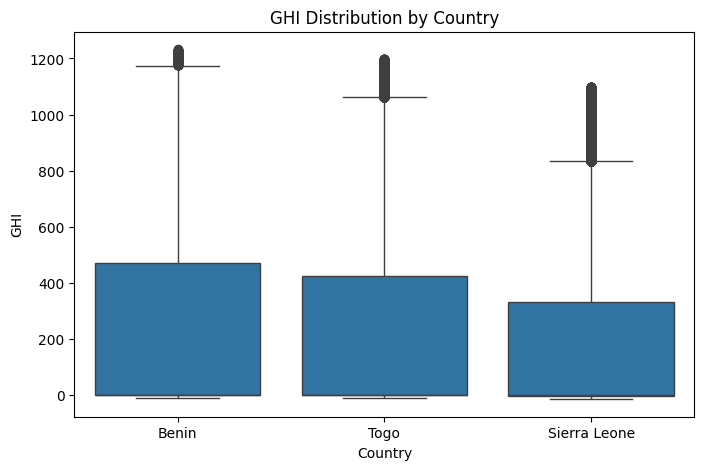

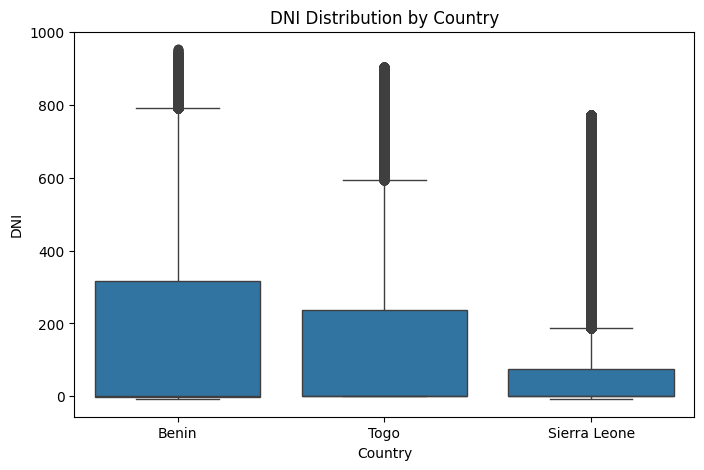

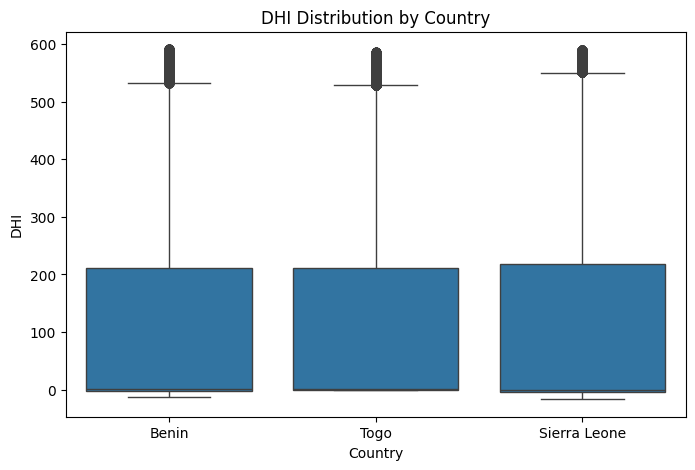

In [8]:
for metric in ['GHI', 'DNI', 'DHI']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Country', y=metric, data=df)
    plt.title(f'{metric} Distribution by Country')
    plt.show()


Summary Table comparing mean, median, and standard deviation of GHI, DNI, DHI across countries.

In [11]:
summary_stats = df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary_stats

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         236.23    0.7  328.29  166.90   -0.1  262.08  111.66    0.5   
Sierra Leone  185.00   -0.4  279.02  104.13   -0.1  200.95  108.10   -0.6   
Togo          223.86    0.5  317.31  147.98    0.0  247.68  112.78    1.5   

                      
                 std  
Country               
Benin         153.10  
Sierra Leone  153.69  
Togo          151.57

### Statistical Testing 

Run a one-way ANOVA (or Kruskal–Wallis) on GHI values to assess whether differences between countries are significant.
Briefly note p-values

In [12]:
# One-way ANOVA
f_val, p_val = f_oneway(benin['GHI'], togo['GHI'], sierra['GHI'])
print(f"ANOVA p-value for GHI: {p_val:.4f}")

# Kruskal-Wallis (non-parametric)
h_val, p_val_kw = kruskal(benin['GHI'], togo['GHI'], sierra['GHI'])
print(f"Kruskal-Wallis p-value for GHI: {p_val_kw:.4f}")

ANOVA p-value for GHI: 0.0000
Kruskal-Wallis p-value for GHI: 0.0000


### Key Observations

A markdown cell with 3 bullet points summarizing what stands out (e.g., “Country X shows highest median GHI but also greatest variability”).

Generally speaking, when we compare three countries GHI (total solar radiation) of median, standard deviation and mean, we can conclude as follow:
- The Benin Solar Energy data shows the highest median GHI with relatively low variability, indicating stable solar potential.
- The Sierra Leone Solar Energy data has the lowest average and median GHI, potentially due to frequent cloud cover.
- The Togo Solar Energy data presents moderate values but with higher standard deviation, suggesting inconsistent irradiance.

### Visual Summary


A small bar chart ranking countries by average GHI.

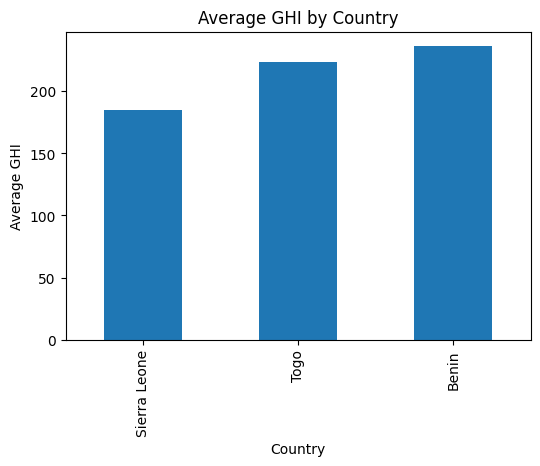

In [13]:
avg_ghi = df.groupby('Country')['GHI'].mean().sort_values()
avg_ghi.plot(kind='bar', title='Average GHI by Country', ylabel='Average GHI', figsize=(6, 4))
plt.show()
